### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import datetime

### Importing data and creating backup

In [2]:
data_copy = pd.read_csv('C:\\Users\\Vipul Agarwal\\Desktop\\time series analysis\\Section 3\\S_3_L_11\\Index2018.csv')
data = data_copy.copy()
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


### Exploring the data and preprocessing 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [4]:
date_lengths = data['date'].str.len()
date_lengths.value_counts()

10    6269
Name: date, dtype: int64

In [5]:
data['date'] = pd.to_datetime(data['date'],format = '%d/%m/%Y', dayfirst = True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [6]:
data = data.set_index('date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6269 entries, 1994-01-07 to 2018-01-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     6269 non-null   float64
 1   dax     6269 non-null   float64
 2   ftse    6269 non-null   float64
 3   nikkei  6269 non-null   float64
dtypes: float64(4)
memory usage: 244.9 KB


In [7]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [8]:
data = data.asfreq('b')
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling missing values

In [9]:
data.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [10]:
indices = np.where([data.isnull() == True])[1]
len(indices)

32

In [11]:
indices

array([3647, 3647, 3647, 3647, 3909, 3909, 3909, 3909, 4170, 4170, 4170,
       4170, 4952, 4952, 4952, 4952, 5213, 5213, 5213, 5213, 5474, 5474,
       5474, 5474, 5735, 5735, 5735, 5735, 6256, 6256, 6256, 6256],
      dtype=int64)

In [12]:
##front filling spx column
data.spx = data.spx.fillna(method = 'ffill')
data.spx.isnull().sum()

0

In [13]:
##backfilling ftse column
data.ftse.fillna(method = 'bfill', inplace = True)

In [14]:
#replacing nan values with the mean for dax column
data.dax.fillna(data.dax.mean(),inplace = True)

In [15]:
data.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [16]:
data.nikkei.fillna(method = 'bfill',inplace = True)

Removing all columns and keeping only one column called market value

In [17]:
data['market_value'] = data['spx']
del data['spx'], data['dax'], data['ftse'], data['nikkei']
data.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Splitting the dataframe into train and test data

In [18]:
size = int(len(data)*0.8)
data_train = data.iloc[:size]
data_test = data.iloc[size:]

## White Noise

In [19]:
wn = np.random.normal(loc = data_train.market_value.mean(), scale = data_train.market_value.std(), size = len(data_train))
data_train['wn'] = wn
data_train.describe()

<ipython-input-19-d7e44d4f798b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['wn'] = wn


,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.368698
std,292.559287,292.858352
min,438.920000,29.245561
25%,914.620000,891.927736
50%,1144.650000,1088.227964
75%,1316.280729,1284.543981
max,1570.252238,2336.187490


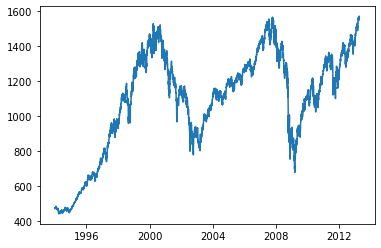

In [20]:
plt.plot(data_train.market_value, label = 'spx')

plt.show()

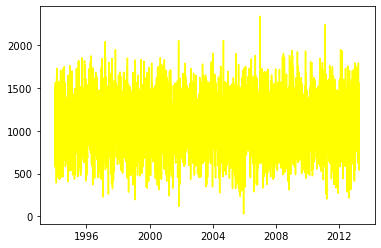

In [21]:
plt.plot(data_train.wn, label = 'white noise', color = 'yellow')
plt.show()

## Random Walk


In [22]:
randwalk = pd.read_csv('RandWalk.csv')
#randwalk.head()
randwalk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7029 non-null   object 
 1   price   7029 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.0+ KB


In [23]:
randwalk.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [24]:
randwalk.date = pd.to_datetime(randwalk.date, dayfirst = True, format = '%d/%m/%Y')
randwalk.set_index('date', inplace = True)
randwalk.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [25]:
randwalk = randwalk.asfreq('b')
randwalk.isnull().sum()

price    0
dtype: int64

In [26]:
data['rw'] = randwalk.price

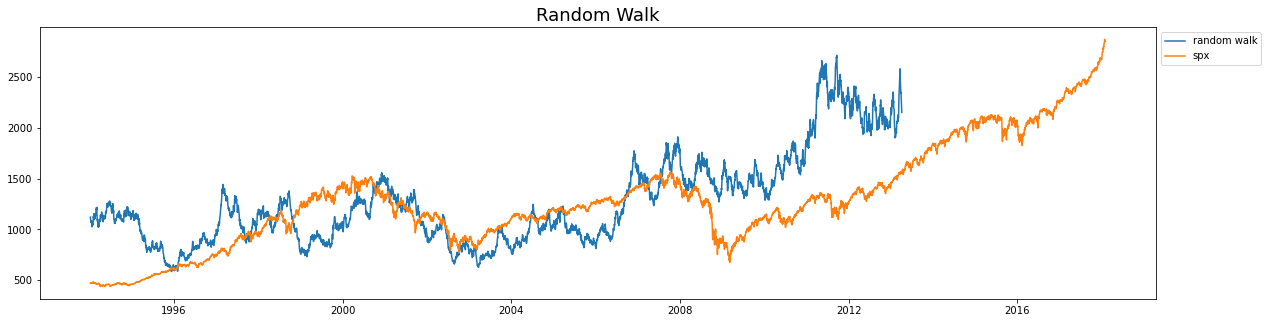

In [27]:
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(data.rw, label = 'random walk')
plt.plot(data.market_value, label='spx')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Random Walk', size = 18)
plt.show()

## Stationarity

In [28]:
import statsmodels.tsa.stattools as sts

In [29]:
sts.adfuller(data.market_value)

(1.119498638172839,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

## Seasonality

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
s_dec_add = seasonal_decompose(data.market_value, model = 'additive')
s_dec_mult = seasonal_decompose(data.market_value, model = 'multiplicative')


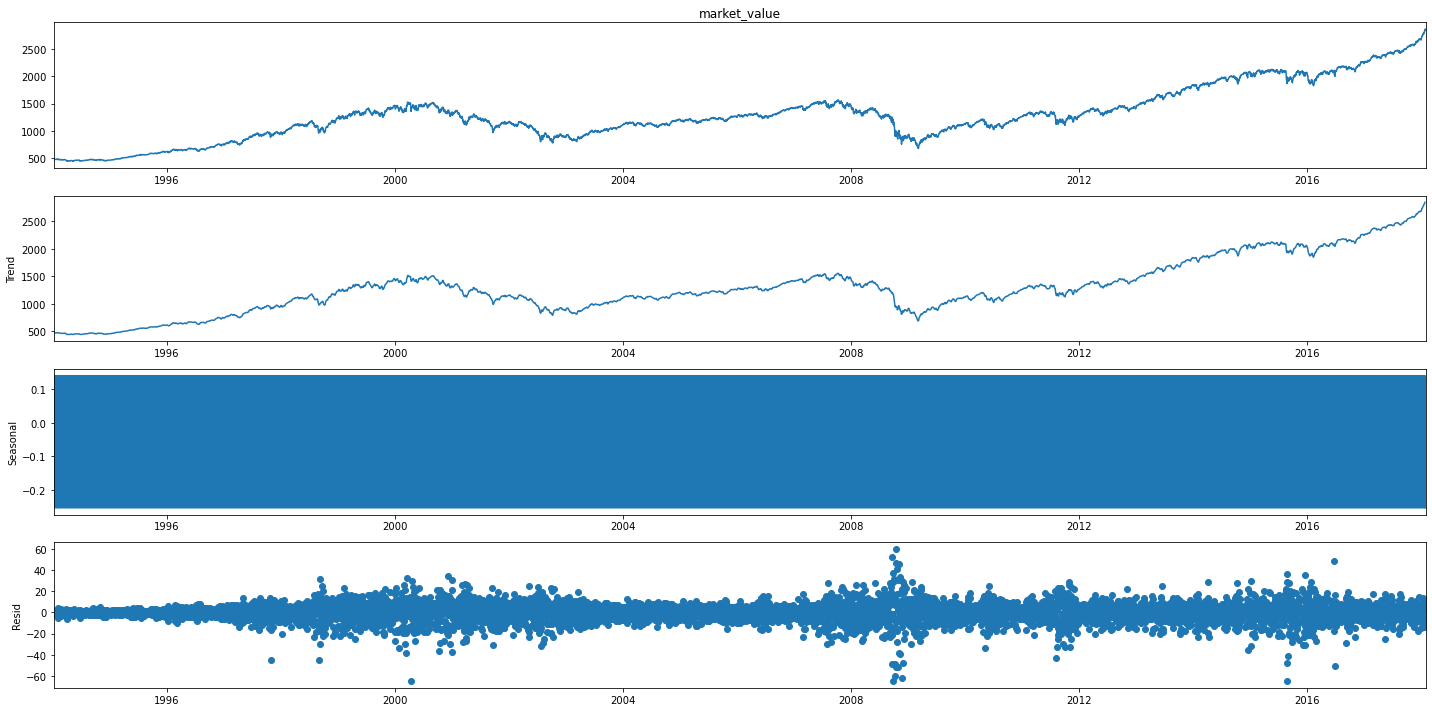

In [32]:
plt.rcParams['figure.figsize'] = (20,10)

s_dec_add.plot()
plt.show()

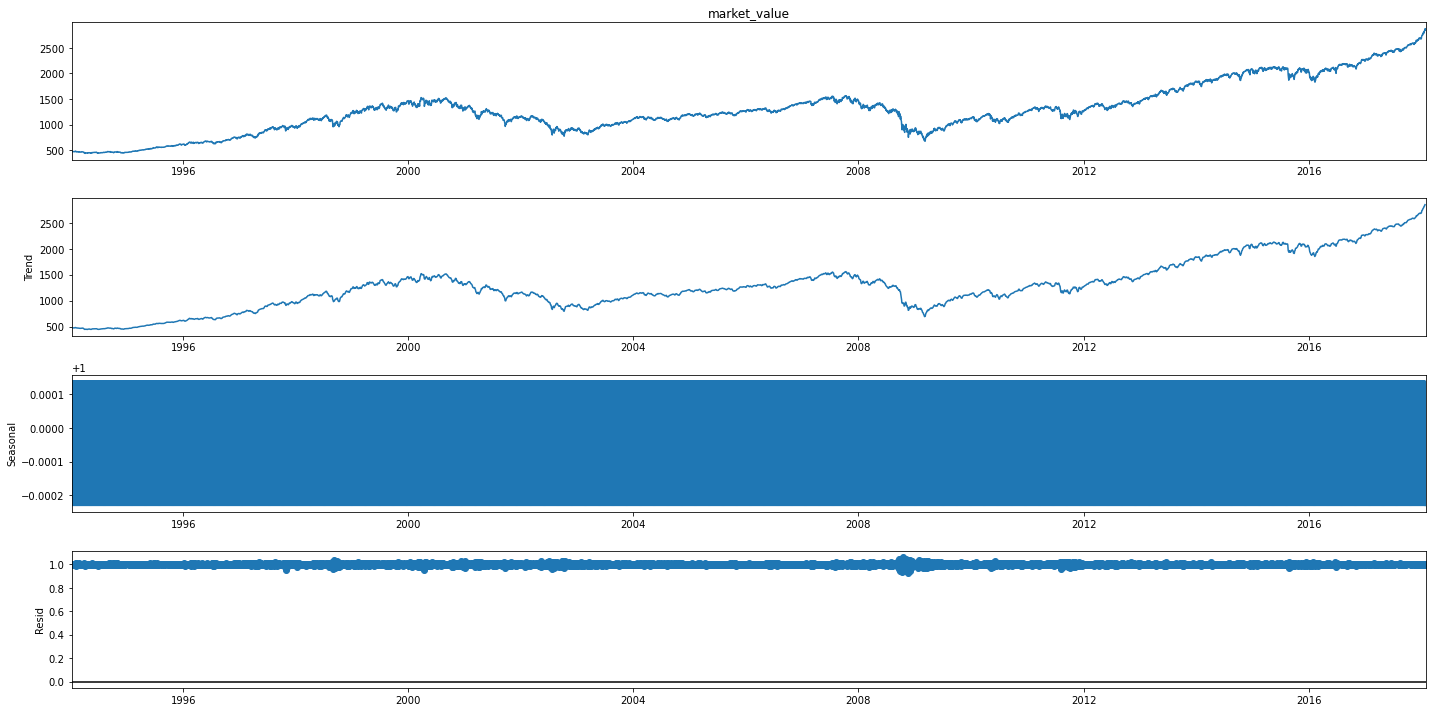

In [33]:
s_dec_mult.plot()
plt.show()

## ACF

In [34]:
import statsmodels.graphics.tsaplots as sgt

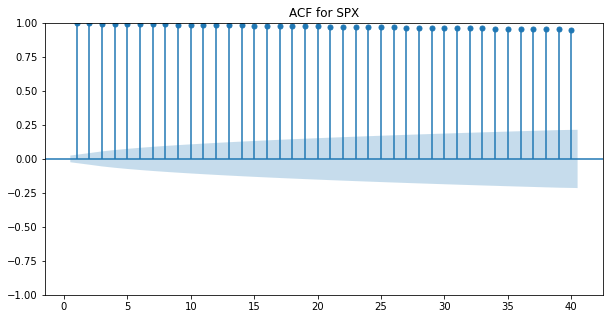

In [35]:
plt.rcParams['figure.figsize'] = (10,5)
sgt.plot_acf(data.market_value, lags = 40, zero = False)
plt.title('ACF for SPX', size = 12)
plt.show()

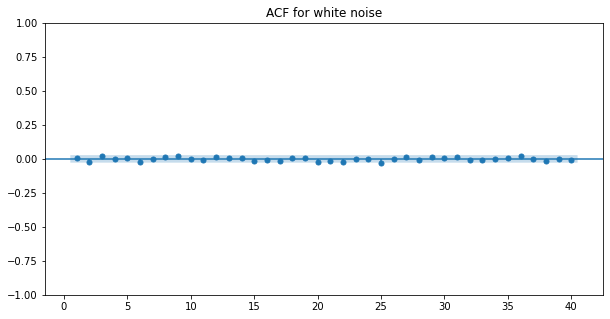

In [36]:
sgt.plot_acf(data_train.wn, lags = 40, zero = False)
plt.title('ACF for white noise', size = 12)
plt.show()

D:\anaconda\lib\site-packages\matplotlib\axes\_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


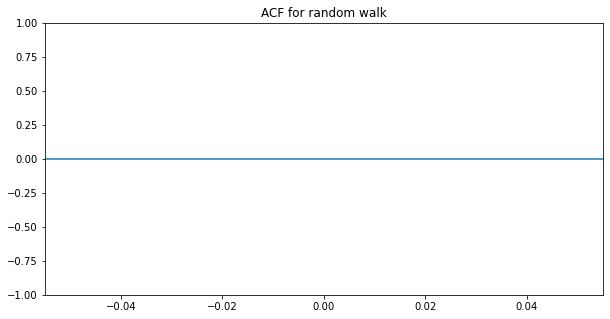

In [37]:
sgt.plot_acf(data.rw, lags = 40, zero = False)
plt.title('ACF for random walk', size = 12)
plt.show()

## Partial auto-correlation function (PACF)

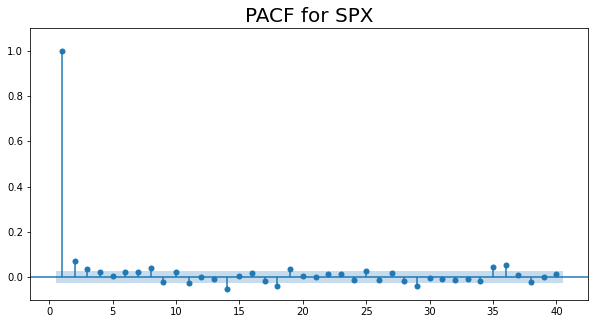

In [39]:
sgt.plot_pacf(data_train.market_value, lags = 40, zero = False, method = 'ols')
plt.ylim(-.1,1.1)
plt.title('PACF for SPX',size = 20)
plt.show()